In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from PIL import Image
from keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

import pathlib

root_dir = './archive'

train_dir = root_dir + '/train'
test_dir = root_dir + '/test'

In [2]:
labels = os.listdir(train_dir)
labels

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [3]:
labels = os.listdir(train_dir)
labels

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [4]:
#counting the images in each dataset

file_count = len(list(pathlib.Path(root_dir).glob('*/*/*.png')))
print('Total image count:', file_count)

file_count = len(list(pathlib.Path(train_dir).glob('*/*.png')))
print('Total training images:', file_count)

file_count = len(list(pathlib.Path(test_dir).glob('*/*.png')))
print('Total testing images:', file_count)

Total image count: 35887
Total training images: 28709
Total testing images: 7178


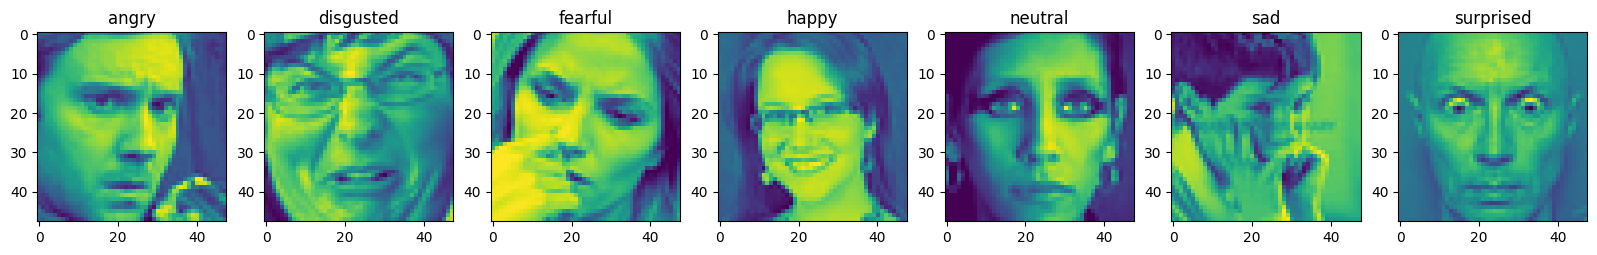

In [5]:
# Displaying some sample images
fig, axes = plt.subplots(1, len(labels), figsize=(20, 8))
for i, label in enumerate(labels):
    img_path = os.path.join(train_dir, label, os.listdir(os.path.join(train_dir, label))[0])
    axes[i].imshow(plt.imread(img_path))
    axes[i].set_title(label)
plt.show()

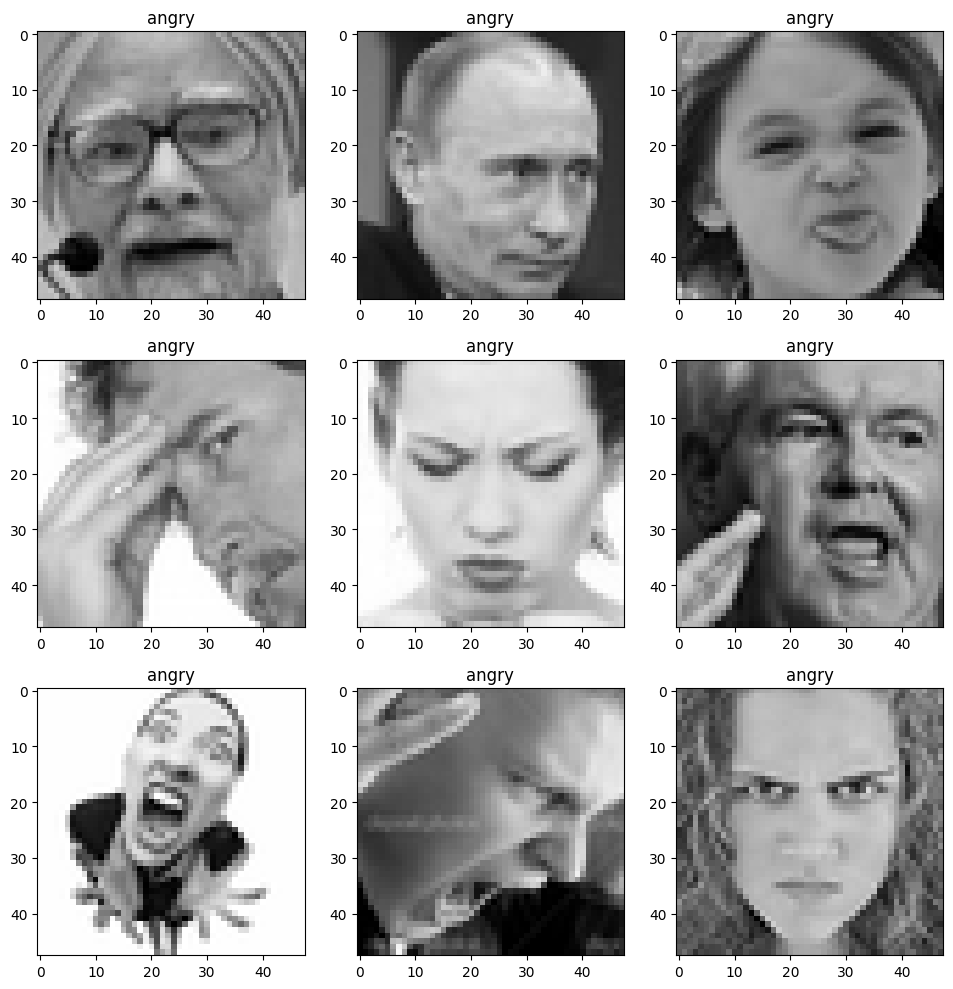

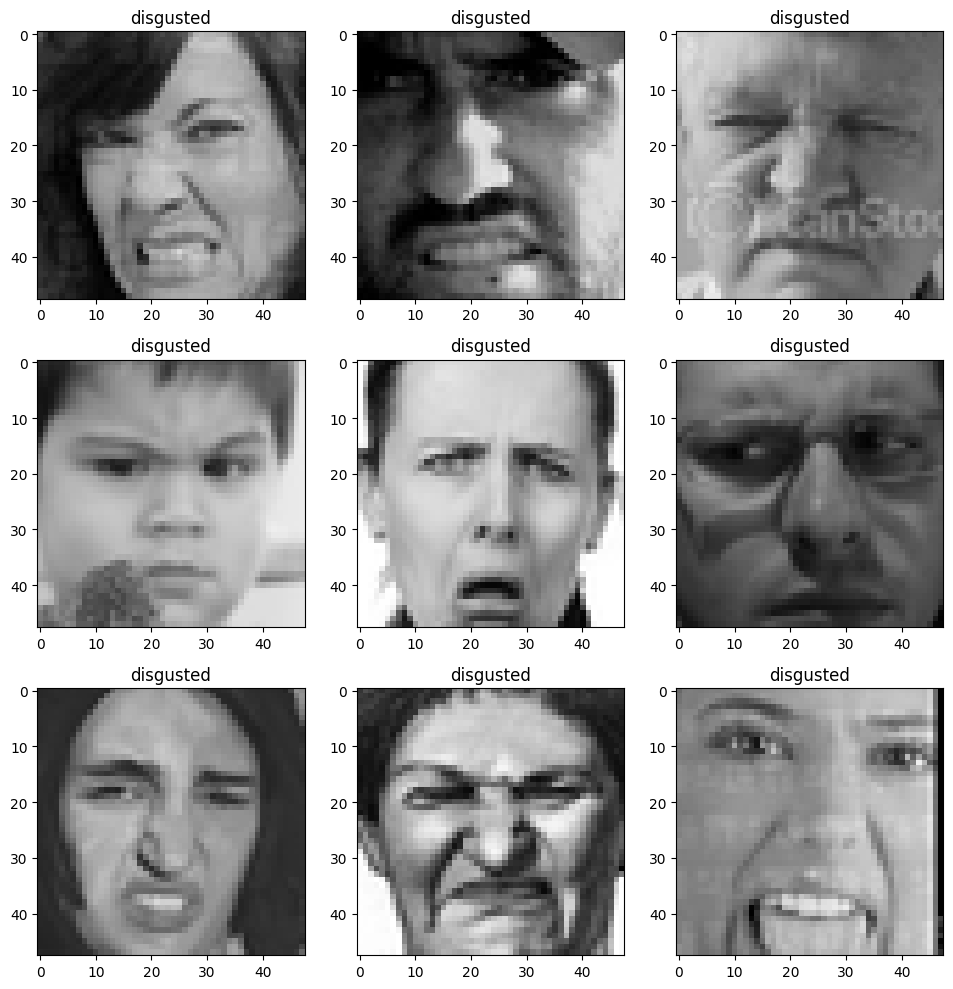

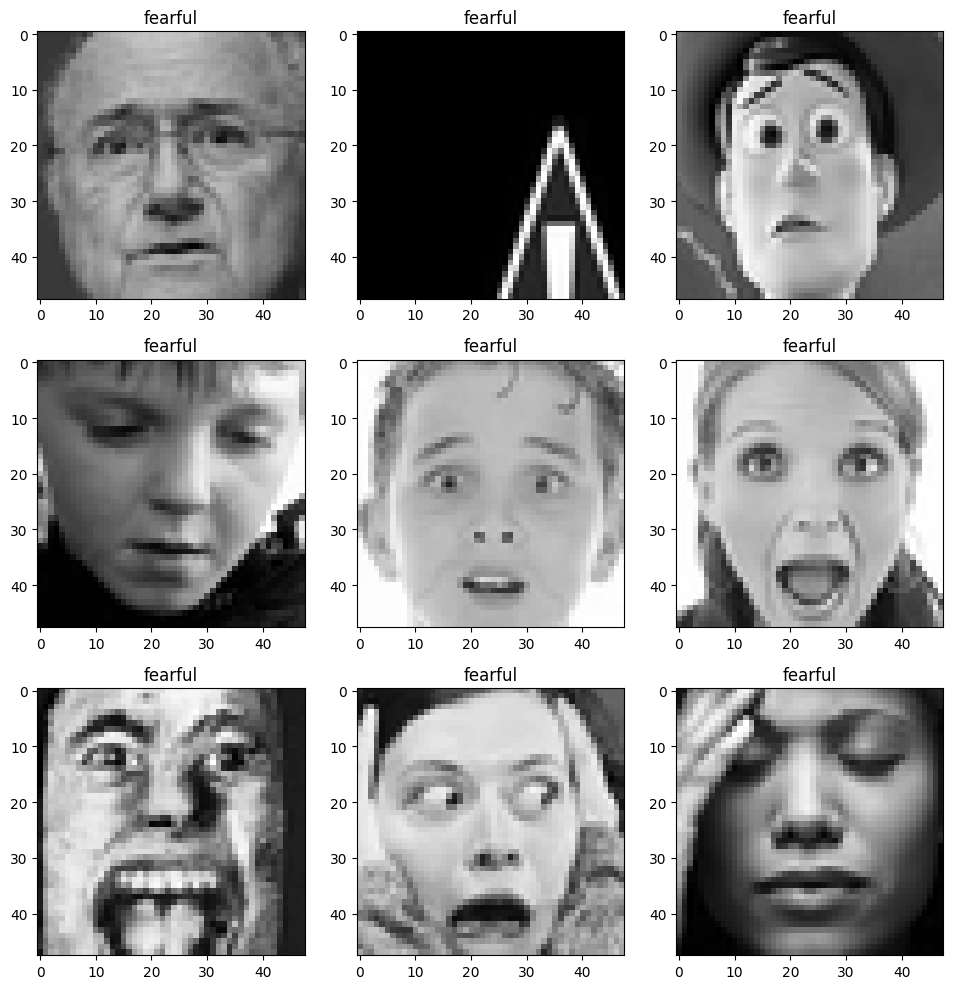

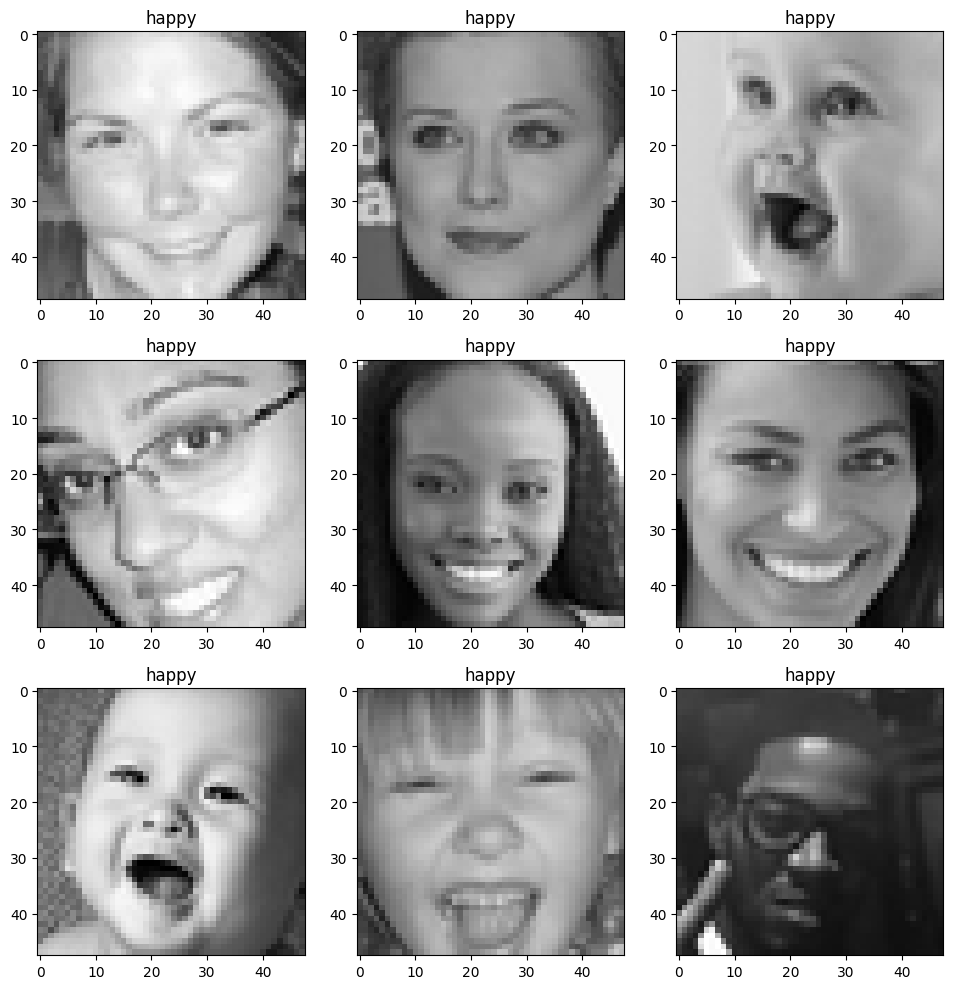

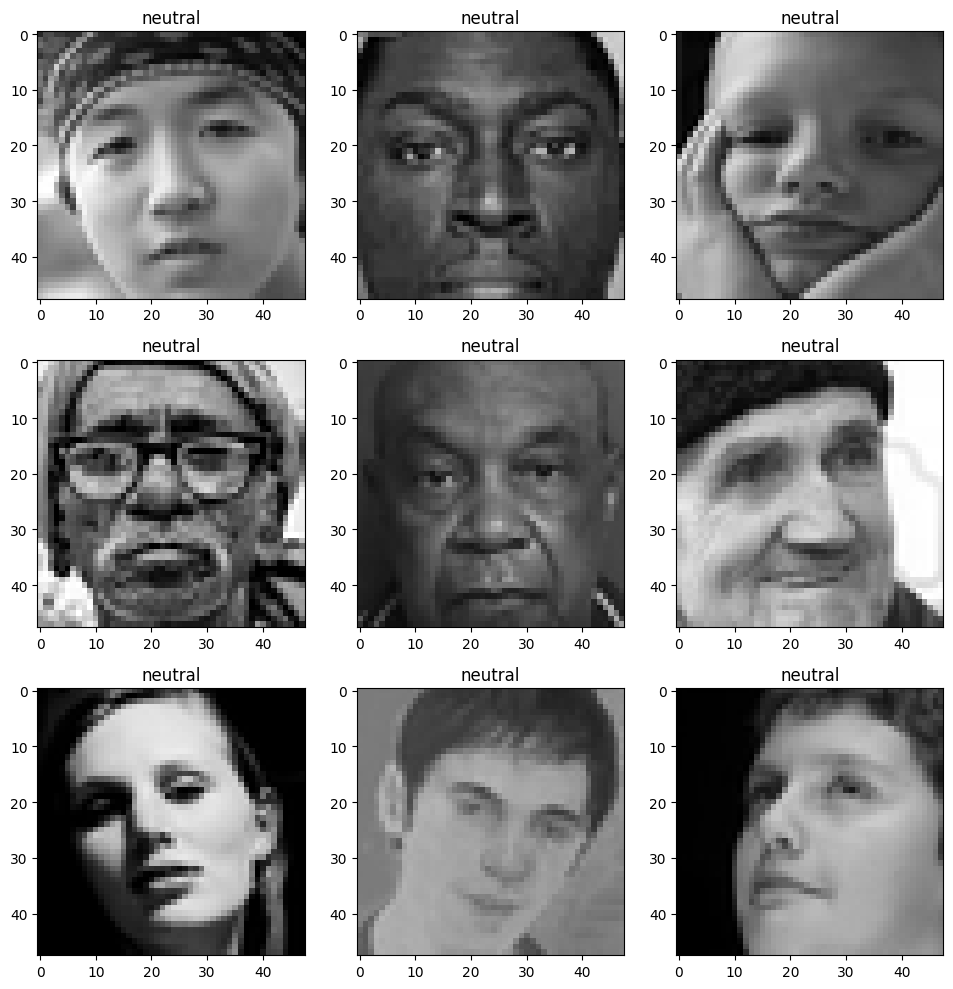

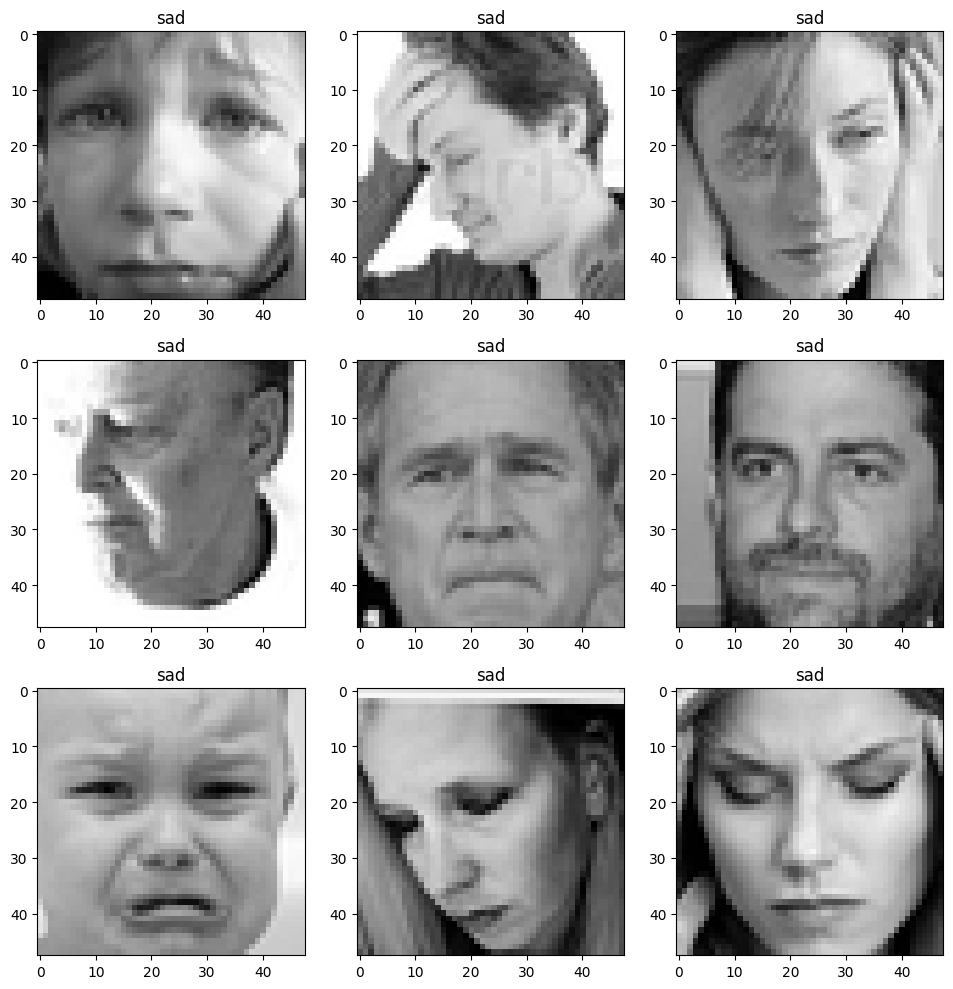

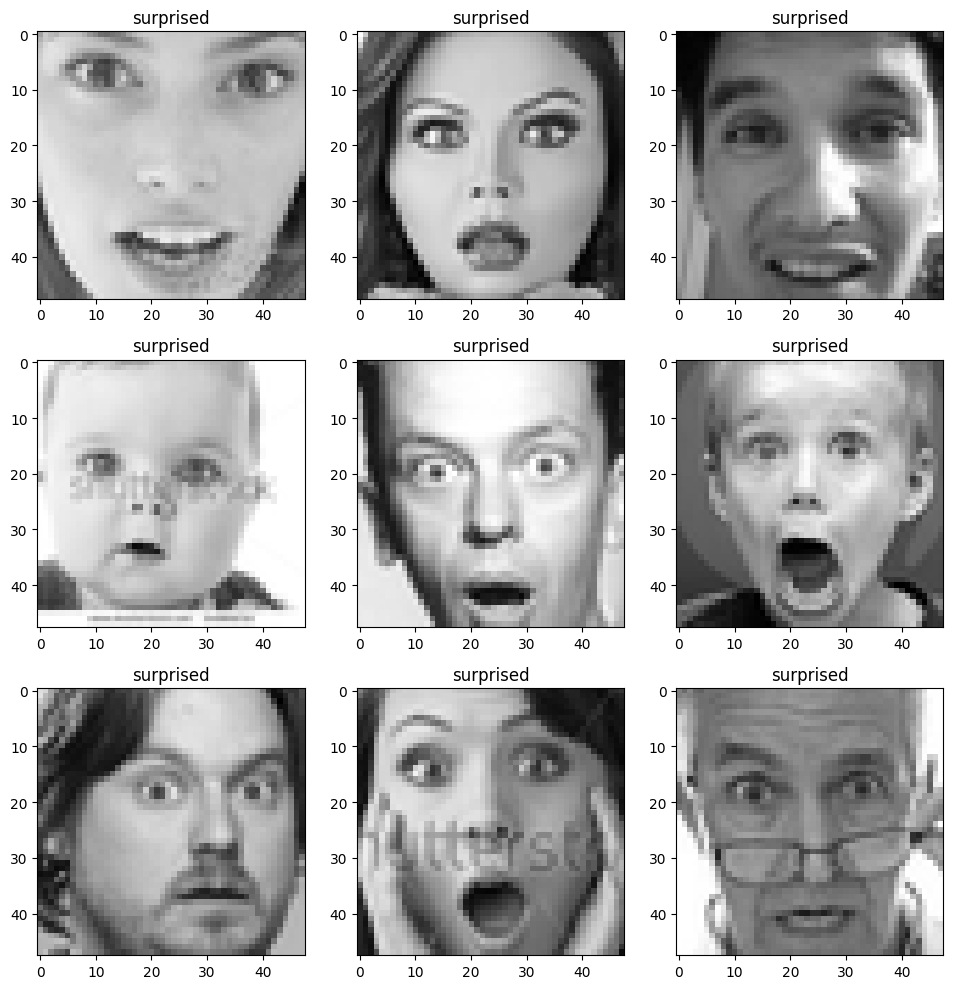

In [6]:
def display_images(emotion):
    plt.figure(figsize=(10, 10))
    for i in range(1, 10):
        plt.subplot(3, 3, i)  # Form a 3x3 grid for each label
        img = image.load_img(os.path.join(train_dir, emotion, os.listdir(os.path.join(train_dir, emotion))[i]), target_size=(48, 48))  # load images
        plt.title(emotion)  # display image label
        plt.imshow(img)  # display image
        plt.tight_layout()  # format images
    plt.show()

for label in labels:
    display_images(label)

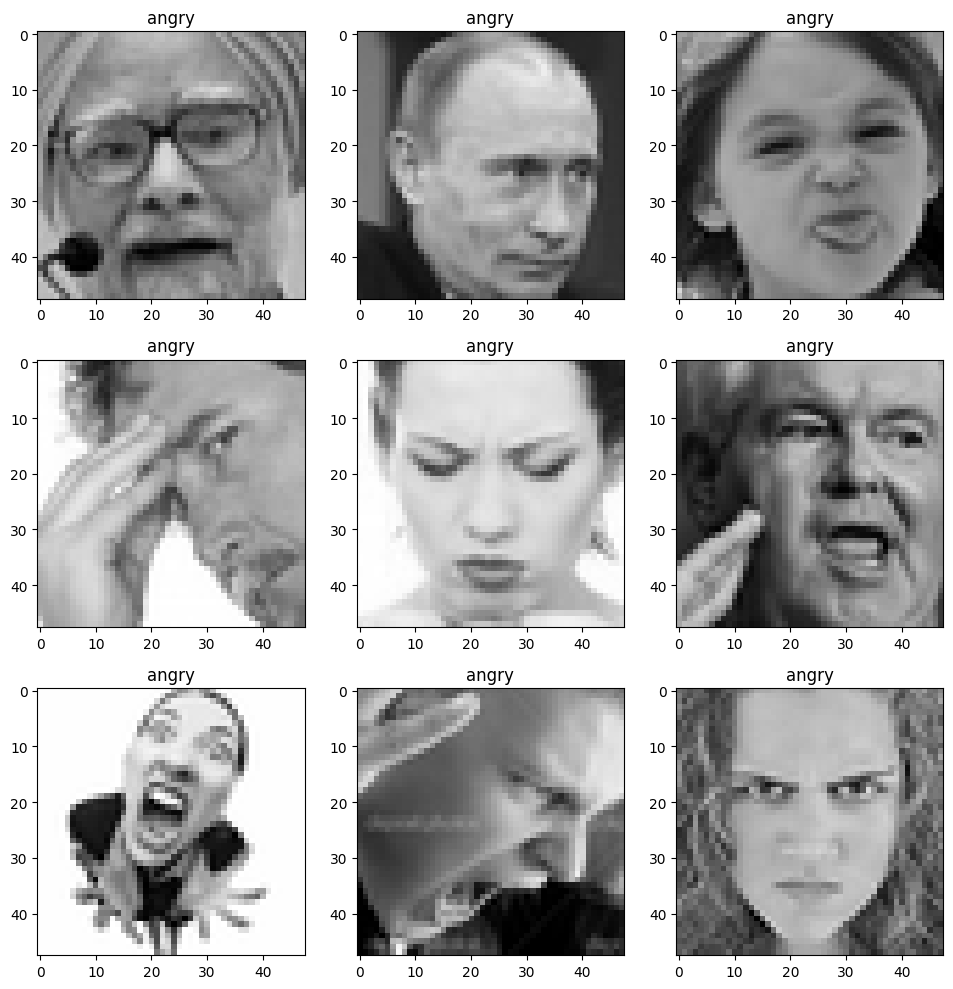

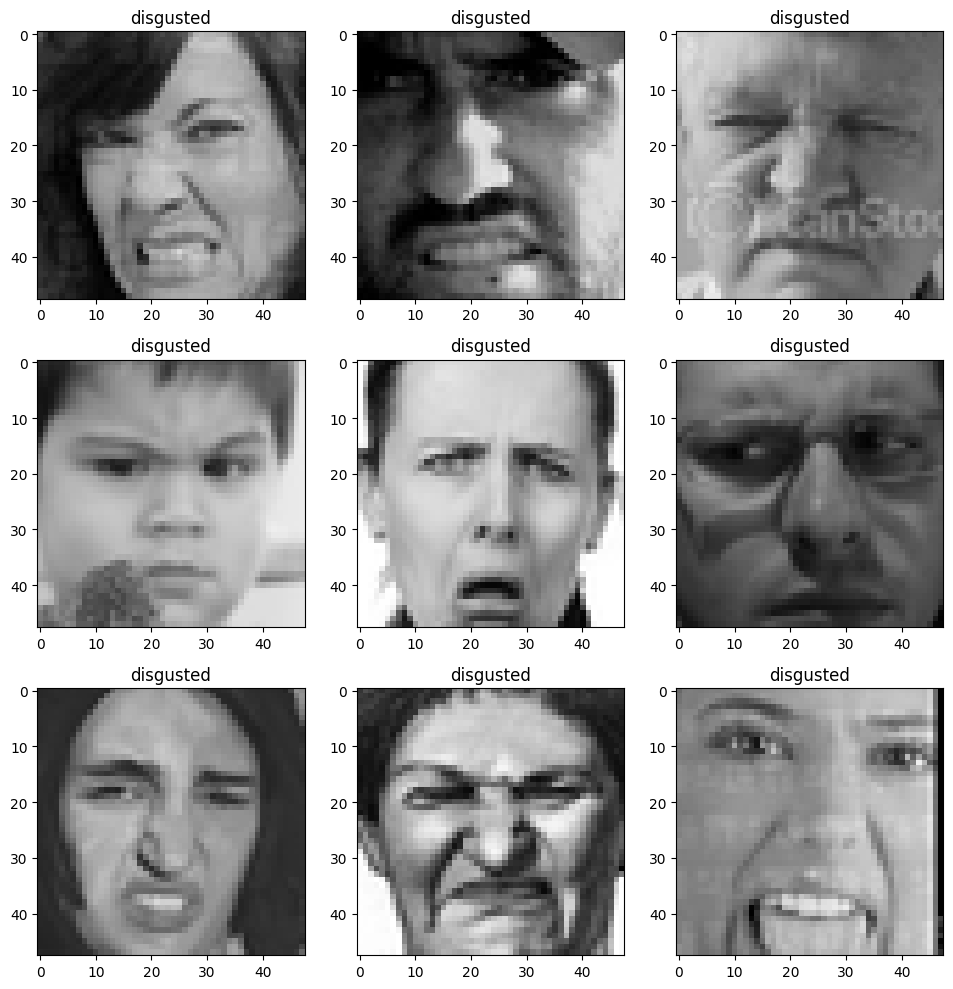

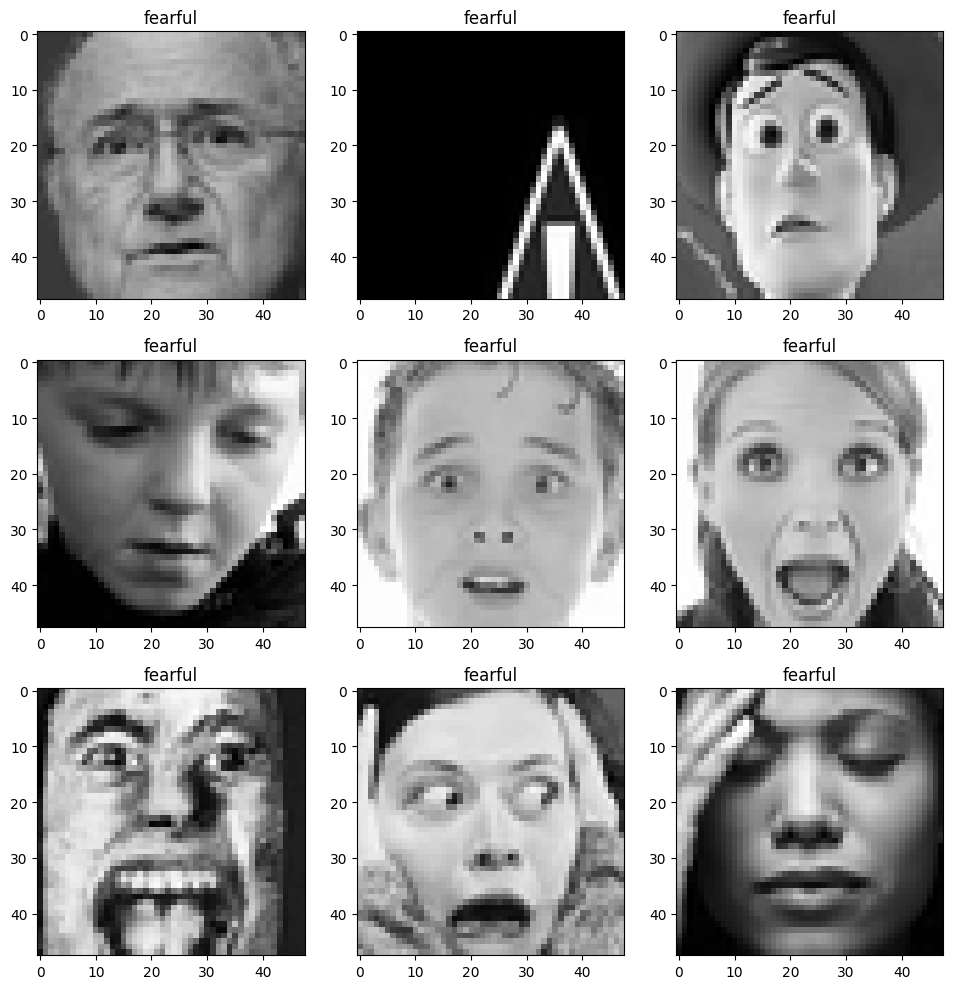

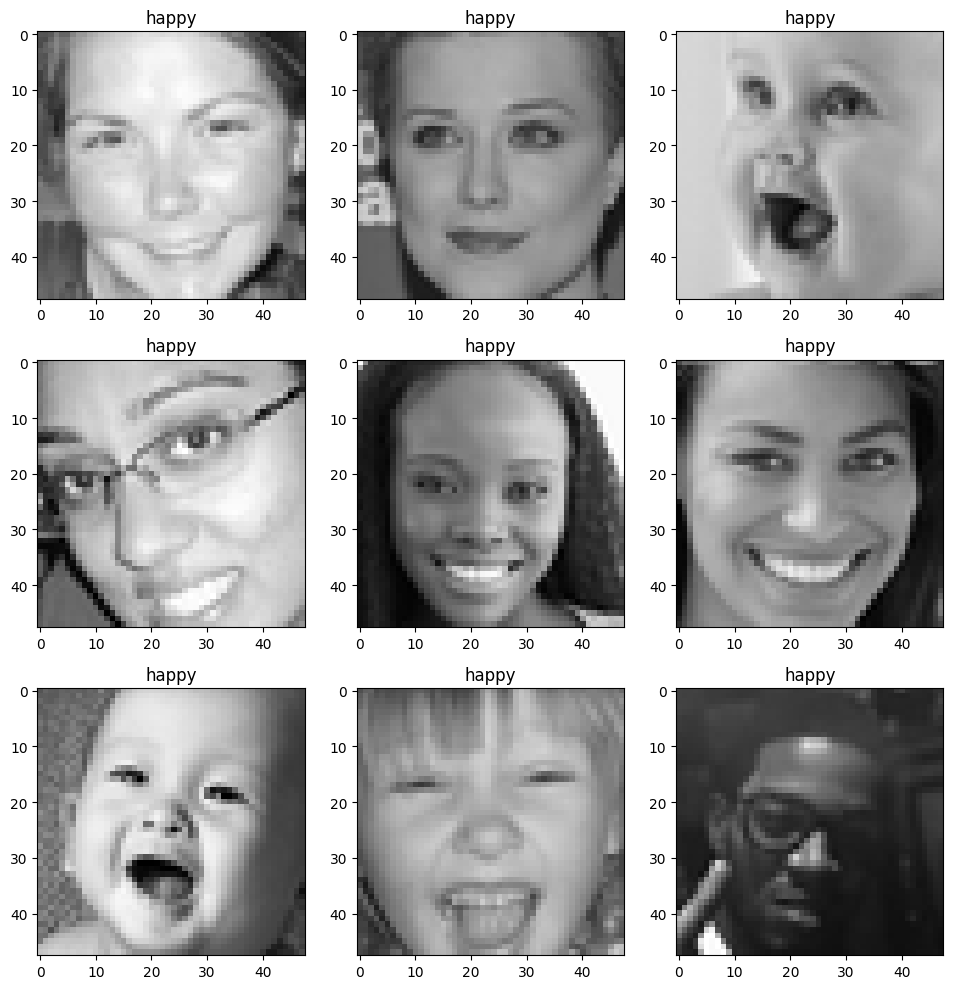

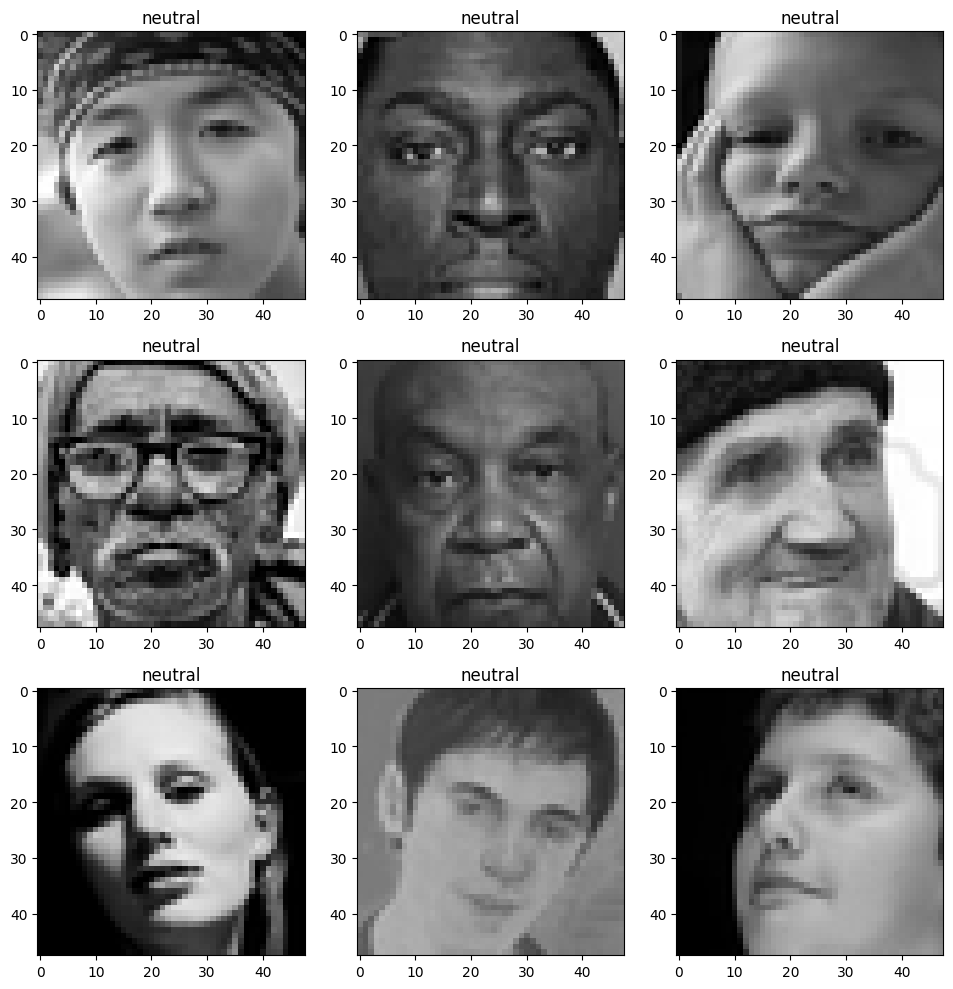

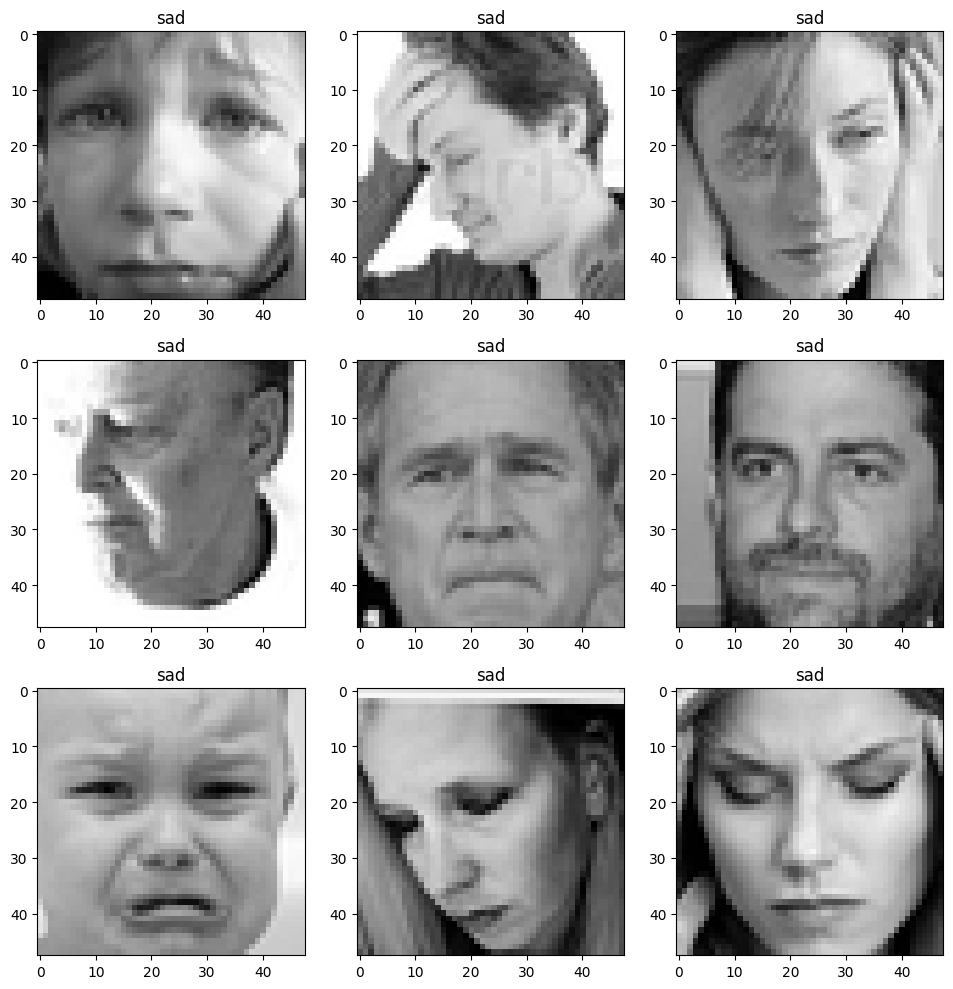

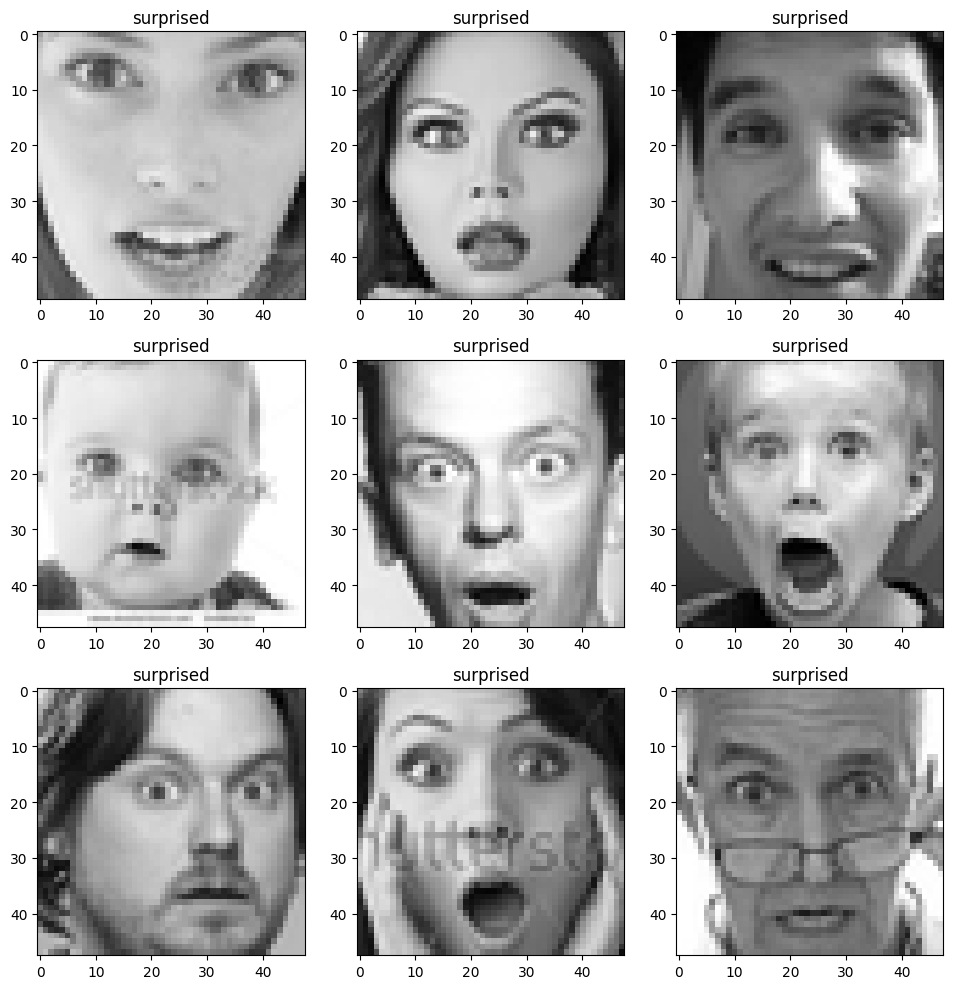

In [7]:
def display_images(emotion):
    plt.figure(figsize=(10,10))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i) #Form a 3x3 grid for each label
        img = image.load_img(train_dir + '/' + emotion + "/" + os.listdir(train_dir + '/' + emotion)[i], target_size=(48, 48)) #load images
        plt.title(emotion) #display image label
        plt.imshow(img) #display image
        plt.tight_layout() #format images
    plt.show()

for i in os.listdir(train_dir):
    display_images(i)

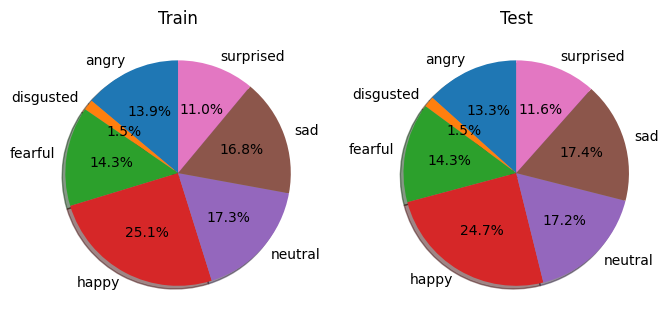

In [8]:
x_train = np.array([len(os.listdir(os.path.join(train_dir, label))) for label in labels])
x_test = np.array([len(os.listdir(os.path.join(test_dir, label))) for label in labels])

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].pie(x_train, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].pie(x_test, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

In [9]:
for label in labels:
    print('Emotion : ' + label)
    print('\tTraining : ' + str(len(os.listdir(os.path.join(train_dir, label)))) + '\n\tTesting : ' + str(len(os.listdir(os.path.join(test_dir, label)))))


Emotion : angry
	Training : 3995
	Testing : 958
Emotion : disgusted
	Training : 436
	Testing : 111
Emotion : fearful
	Training : 4097
	Testing : 1024
Emotion : happy
	Training : 7215
	Testing : 1774
Emotion : neutral
	Training : 4965
	Testing : 1233
Emotion : sad
	Training : 4830
	Testing : 1247
Emotion : surprised
	Training : 3171
	Testing : 831


In [10]:
# Bar charts
train_dist = np.array([len(os.listdir(os.path.join(train_dir, label))) for label in labels])
test_dist = np.array([len(os.listdir(os.path.join(test_dir, label))) for label in labels])

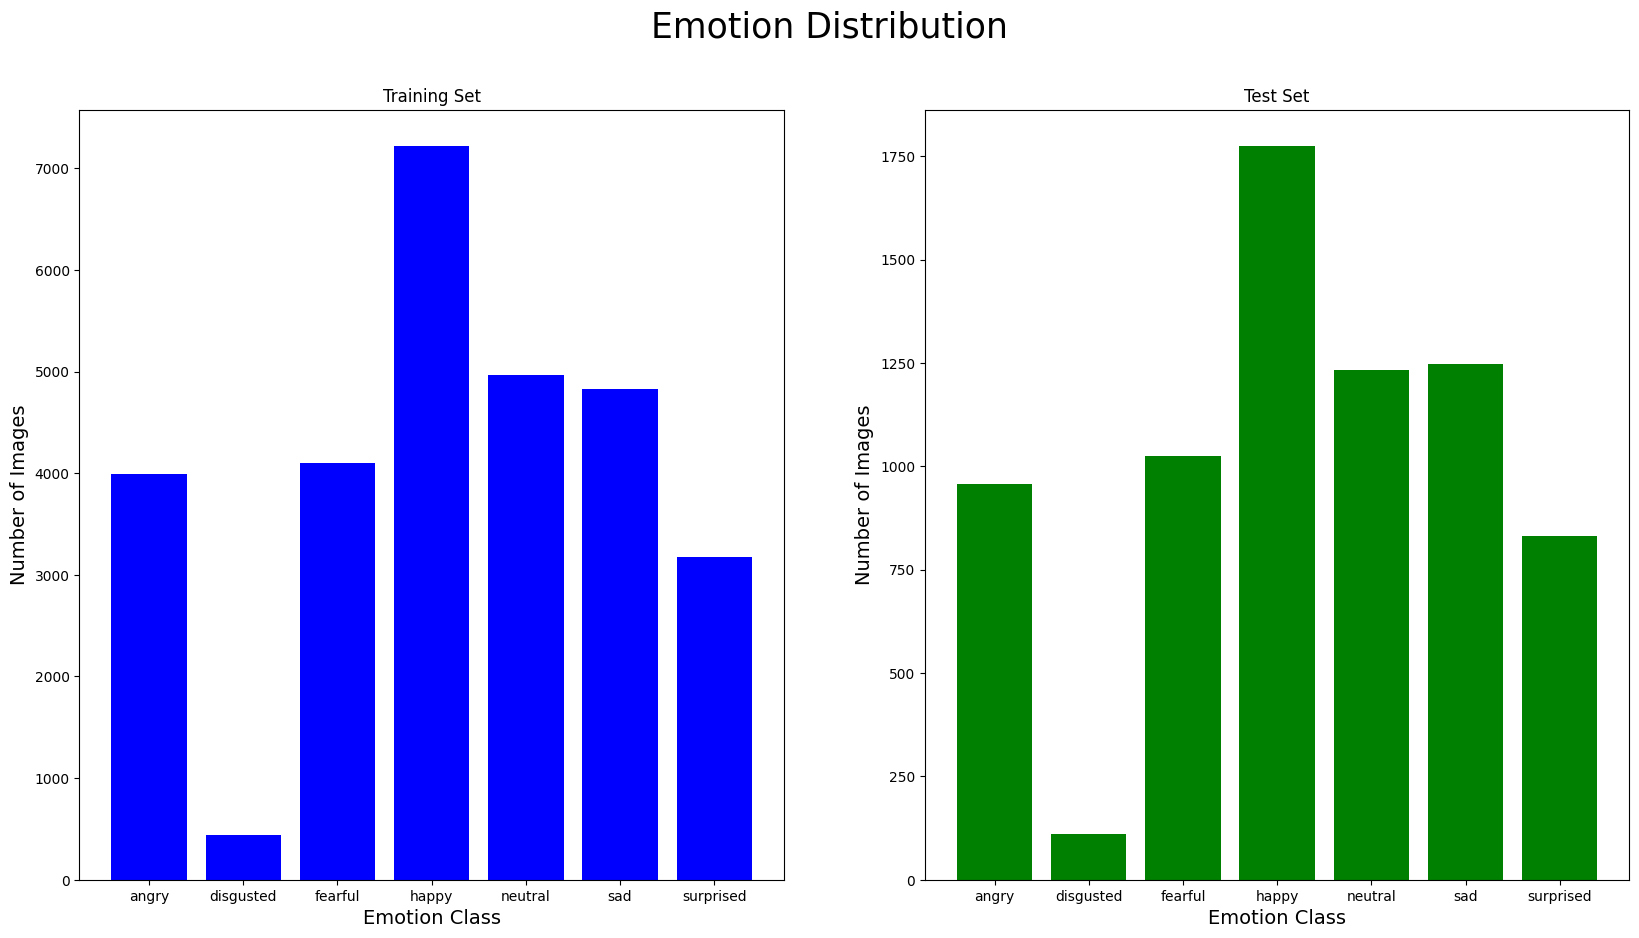

In [11]:
plt.figure(figsize=(20, 10))
plt.suptitle('Emotion Distribution', fontsize=25)

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Training Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(labels, train_dist, color='blue')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(labels, test_dist, color='green')
plt.show()


In [12]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)
# Read our images to the data augmentations
# Generates batches of augmented data
train = train_datagen.flow_from_directory(train_dir,
                                          subset='training',
                                          color_mode='grayscale',
                                          target_size=(48, 48),
                                          batch_size=64,
                                          shuffle=True,
                                          class_mode='categorical')

valid = train_datagen.flow_from_directory(train_dir,
                                          subset='validation',
                                          color_mode='grayscale',
                                          target_size=(48, 48),
                                          batch_size=64,
                                          shuffle=True,
                                          class_mode='categorical')

test = test_datagen.flow_from_directory(test_dir,
                                        color_mode='grayscale',
                                        target_size=(48, 48),
                                        batch_size=64,
                                        shuffle=False,
                                        class_mode='categorical')



Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
print(train.class_indices)


{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [14]:
print(test.class_indices)

{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(48, 48, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(len(labels), kernel_initializer='he_normal'))  # Ensure the final dense layer matches the number of labels
model.add(Activation('softmax'))

c:\Users\knigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 1,677,735 (6.40 MB)

 Trainable params: 1,675,815 (6.39 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
model_1 = model.fit(train, validation_data=valid, epochs=50)

Epoch 1/50


c:\Users\knigh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 83/359 ━━━━━━━━━━━━━━━━━━━━ 3:43 808ms/step - accuracy: 0.1685 - loss: 3.0710

KeyboardInterrupt: 

NameError: name 'model_1' is not defined

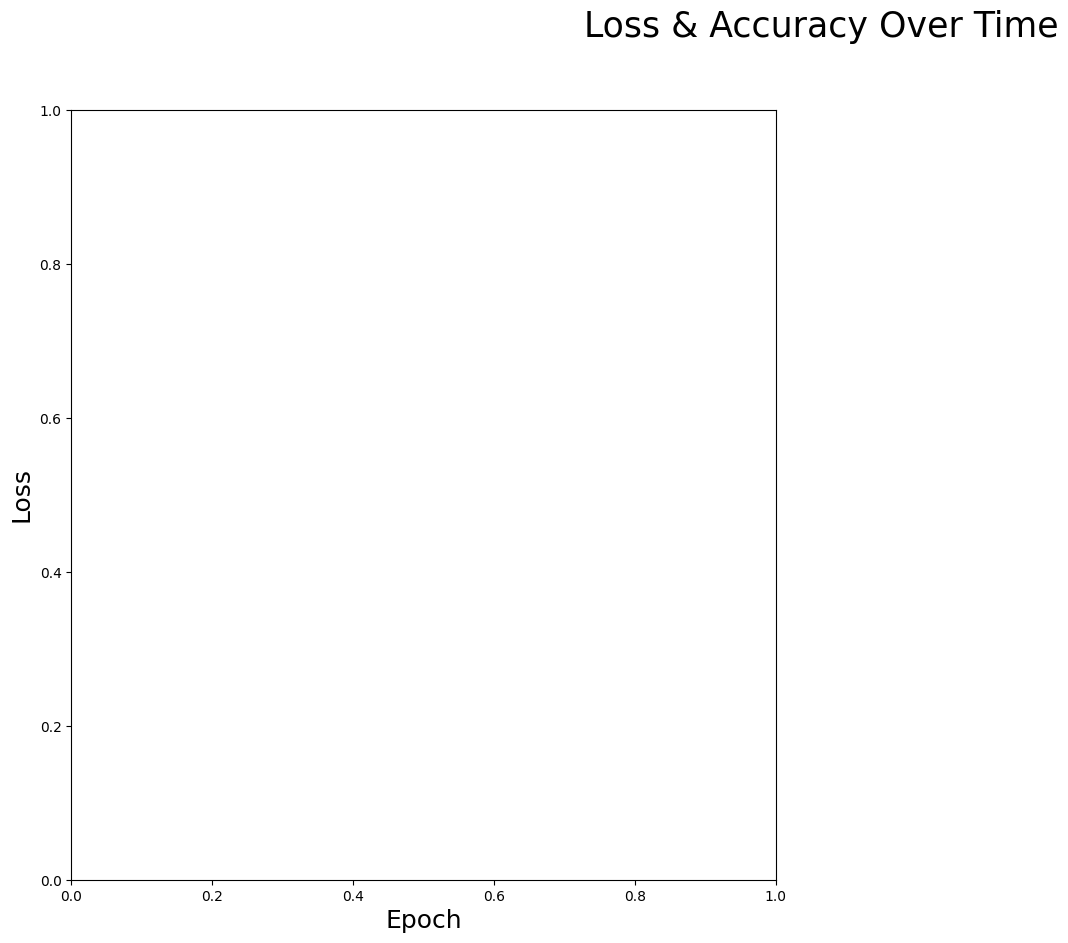

In [ ]:
plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(model_1.history['loss'], label='Training Loss')
plt.plot(model_1.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_1.history['accuracy'], label='Training Accuracy')
plt.plot(model_1.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(test)


In [ ]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [ ]:
y_actual = test.classes[test.index_array]


In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
 from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_pred_labels, digits=4))


In [ ]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)